### Exploring one instance of the LUNA16. 

The first attempt that I will make is to understand the data that we are provided, the format, and what is included in each file. I also wonder, can we visualize these CT scans?
To make this happen, I will get started first by "dismantling" a single file, and treating this as a playground. I am documenting my approach in real-time with you: my intent is not re-iterate on this notebook, but instead walk sequentially, as if we were both using the console together. Let's get started!

#### Validating the number of files, their extensions, and their sizes. I will start analyzing first the number of files, and their extensions

In [2]:
import os
from collections import namedtuple, Counter
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
from LUNA16.utils.analyze_folders import analyze_folder
ROOT_FOLDER = "/home/azureuser/cloudfiles/data/LUNA16/extracted"

In [3]:
all_files = analyze_folder(ROOT_FOLDER)

In [4]:
all_files

[]

In [4]:
print(f"Total Files: {len(all_files)}")
all_extensions = ([file.extension for file in all_files])
unique_extensions = set(all_extensions)
extension_counter = Counter(all_extensions)
print(f"Unique Extensions: {len(unique_extensions)},\t {(extension_counter.most_common())}")
for ext in ['mhd', 'raw', 'zraw']:
    all_sizes = ([file.size  for file in all_files if file.extension == ext])
    all_sizes = pd.Series(all_sizes)
    print(f"Distribution of {ext}: {all_sizes.describe()}")


Total Files: 3567
Unique Extensions: 7,	 [('mhd', 1776), ('raw', 888), ('zraw', 888), ('csv', 7), ('py', 4), ('txt', 3), ('png', 1)]
Distribution of mhd: count    1776.000000
mean      437.398649
std        25.473474
min       380.000000
25%       419.000000
50%       436.000000
75%       455.000000
max       518.000000
dtype: float64
Distribution of raw: count    8.880000e+02
mean     1.341569e+08
std      7.012939e+07
min      4.980736e+07
25%      7.222067e+07
50%      1.245184e+08
75%      1.599078e+08
max      4.005560e+08
dtype: float64
Distribution of zraw: count    8.880000e+02
mean     5.170531e+05
std      3.132632e+05
min      1.455780e+05
25%      2.680908e+05
50%      4.261940e+05
75%      6.244448e+05
max      1.659891e+06
dtype: float64


In summary:

- We have 3567 files, out of which few are non-data files (we will explore those later)
- 1776 metadata files (.mhd files) for 888*2 raw and zraw files.

I am now intrigued in exploring the Png file, the txt files, the python files, then the CSV ones.
#### Exploring the PNG file

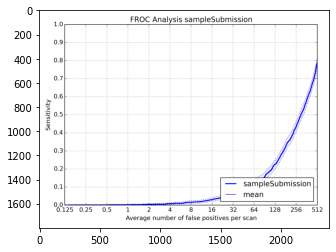

In [5]:
png_file = [file for file in all_files if file.extension == "png"]
png_file = png_file[0] # we know the list has only one element from querying "all_files"
png_image = Image.open(png_file.folder)
plt.imshow(png_image)
plt.show()

In [7]:
txt_files = [file for file in all_files if file.extension == "txt"]
for file in txt_files:
    print(file.filename + "\t" + str(file.size / 1024))
    with open(file.folder, 'r') as f:
        print(f.readline())

froc_sampleSubmission.txt	20713.01953125
0.000000000,0.000000000,1.999999936

CADAnalysis.txt	0.5625


nodulesWithoutCandidate_sampleSubmission.txt	7.9580078125
1.3.6.1.4.1.14519.5.2.1.6279.6001.122621219961396951727742490470,None,-58.38635605,0.082104855,-247.7679608,14.163963070,-1



In [35]:
py_files = [file for file in all_files if file.extension == "py"]
for file in py_files:
    print(file.folder + "\t" + str(file.size / 1024))
    with open(file.folder, 'r') as f:
        print(f.readline())

/home/azureuser/cloudfiles/data/LUNA16/extracted/evaluationScript/noduleCADEvaluationLUNA16.py	22.001953125
import os

/home/azureuser/cloudfiles/data/LUNA16/extracted/evaluationScript/NoduleFinding.py	0.65625
class NoduleFinding(object):

/home/azureuser/cloudfiles/data/LUNA16/extracted/evaluationScript/tools/csvTools.py	0.7744140625
import csv

/home/azureuser/cloudfiles/data/LUNA16/extracted/evaluationScript/tools/__init__.py	0.126953125
"""

